<a href="https://colab.research.google.com/github/sanglee/ml_basics_2019_IEIE/blob/master/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

# Machine Learning

<br>

## Sangkyun Lee <br> Hanyang University ERICA

<br>
<br>

In [0]:
from IPython.display import Image
%matplotlib inline

# Principal Component Analysis (PCA)

- Unsupervised linear transformation, mostly used for:
    - dimensionality reduction
    - data de-noising
    - data visualization
    

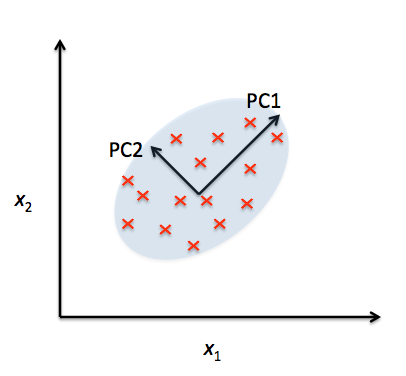

In [0]:
Image(filename='./images/05_01.png', width=400) 

- PCA aims to find the **orthogonal** directions of **maximum variance** in the feature speace
- PCA projects the original data points onto a new subspace with equal of fewer dimensions than the original space
   - $x_1$ and $x_2$: original feature axes
   - PC1 and PC2: principal components

### PCA Problem

Denote the $(i)$th data point as $x^{(i)} \in \mathbb{R}^p$.

We define new coordinate of the $(i)$th data point along a vector $v \in \mathbb{R}^p$,

$$
      z^{(i)} = v_1 x^{(i)}_1 + \dots + v_p x^{(i)}_p, \;\; i=1,2,\dots,n
$$

$$
      z = Xv \in \mathbb{R}^n
$$

Variance:
$$
      \max_{v \in \mathbb{R}^p} \;\; \frac{1}{n} \sum_{i=1}^n (z^{(i)} - \mu_z)^2
$$

Variance (with centered data):
$$
      \max_{v \in \mathbb{R}^p} \;\; \frac{1}{n} z^Tz
$$

$$
      \max_{v \in \mathbb{R}^p} \;\; \frac{1}{n} (Xv)^T(Xv) = \frac{1}{n} v^T X^T X v = v^T \Sigma v
$$

#### Rayleigh Quotient

For a symmetric matrix $\Sigma$, the Rayleigh quotient is defined as
$$
  R(\Sigma,v) := \frac{v^T \Sigma v}{v^T v}
$$

For the smallest and largest eigenvalues $\lambda_\min$ and $\lambda_\max$ of $\Sigma$, we can show that

$$
   \lambda_\min \le R(\Sigma, v) \le \lambda_\max
$$

where the minimum and the maximum are achieved by the eigenvectors corresponding to $\lambda_\min$ and $\lambda_\max$.

#### PC1

Using the fact about the Rayleigh quotient, we will set

$$
    z = Xv_\max, 
$$

where $v_\max$ is the eigenvector associated with $\lambda_\max$. Here, $v_\max$ is the first principal component (PC1), and $z$ contains the locations of $m$ points on the PC1.

#### PC2, PC3, ... PCk

PC2 should be the direction of the maximum variance, excluding the variance already explained by the PC1. Further, PC2 should be orthogonal to the PC1.

It turns out, that PC2, PC3, ..., PCk corresponds to the eigenvectors associated with the second largest, the third largest, ..., the $k$-th largest eigenvalues of $\Sigma$.


In [0]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Splitting the data into 70% training and 30% test subsets.

In [0]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

Standardizing the data.

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Eigendecomposition of the covariance matrix.

In [0]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
#eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[0.08414846 0.16831254 0.21432212 0.2399553  0.29595018 0.33051429
 0.52251546 0.60181514 0.84906459 1.01233462 1.42809973 2.46635032
 4.8923083 ]


In [0]:
print('Dim of X_train_std', np.shape(X_train_std))
print('Dim of cov_mat = ', np.shape(cov_mat))

Dim of X_train_std (124, 13)
Dim of cov_mat =  (13, 13)


<br>
<br>

## Total and explained variance

In [0]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

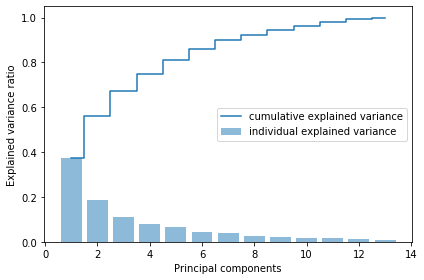

In [0]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

<br>
<br>

## Feature transformation

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [0]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.14669811  0.50417079]
 [ 0.24224554  0.24216889]
 [ 0.02993442  0.28698484]
 [ 0.25519002 -0.06468718]
 [-0.12079772  0.22995385]
 [-0.38934455  0.09363991]
 [-0.42326486  0.01088622]
 [ 0.30634956  0.01870216]
 [-0.30572219  0.03040352]
 [ 0.09869191  0.54527081]
 [-0.30032535 -0.27924322]
 [-0.36821154 -0.174365  ]
 [-0.29259713  0.36315461]]


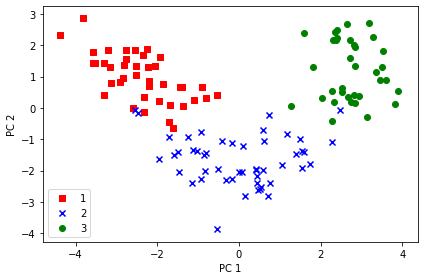

In [0]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [0]:
X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

In [0]:
X_train_std[0].dot(w)

array([-2.59891628,  0.00484089])

<br>
<br>

## Principal component analysis in scikit-learn

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

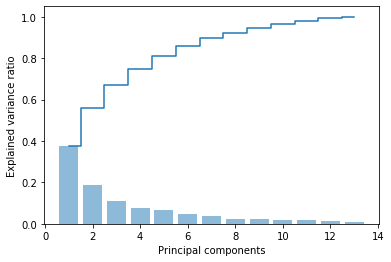

In [0]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [0]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

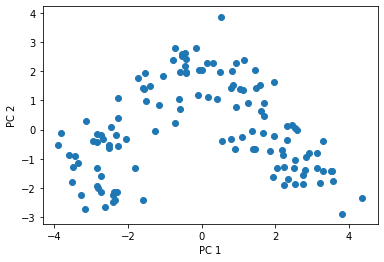

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)]*sum(y==cl),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

Training logistic regression classifier using the first 2 principal components.

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_pca, y_train)

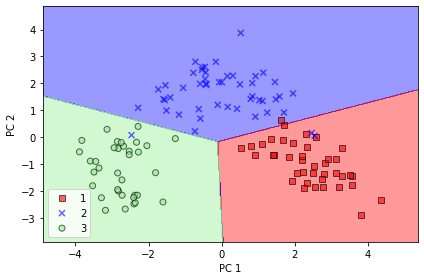

In [0]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

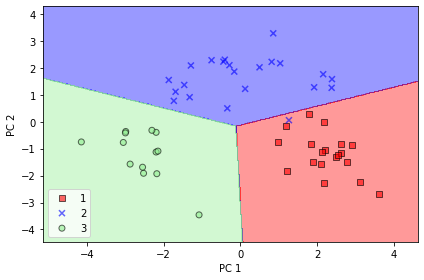

In [0]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

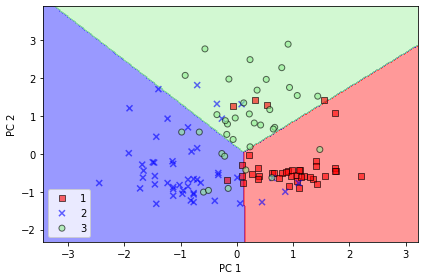

In [0]:
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_std[:,0:2], y_train)

plot_decision_regions(X_train_std[:,0:2], y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

<br>
<br>

<br>
<br>

# Supervised data compression via linear discriminant analysis (LDA)

In [0]:
from IPython.display import Image
%matplotlib inline

In [0]:
import pandas as pd

# wine data
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

# train & test split
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)
    
from sklearn.preprocessing import StandardScaler

# standardize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [0]:
import numpy as np

#### PCA
- To find orthogonal directions of maximum variance in a dataset
- Unsupervised

#### LDA
- To find the feature subspace that optimizes class separability
- Supervised
- Assumptions:
   - features are normally distributed
   - features are independent of each other 
   - the covariance matrices of individual classes are identical

#### Both PCA & LDA
- Linear transformation


#### LDA [Fisher 1936, Rao 1948]

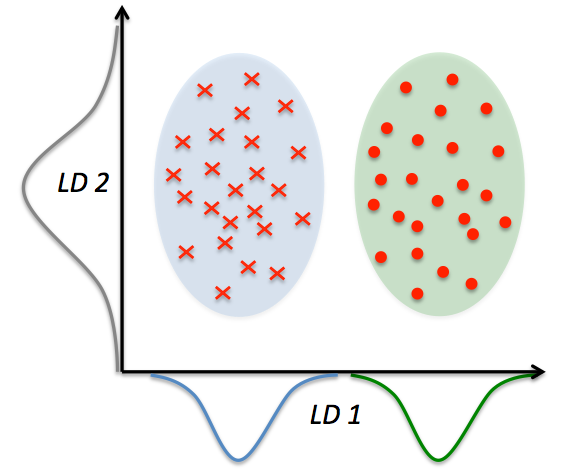

In [0]:
Image(filename='./images/05_06.png', width=400) 

- LD1: would separate the classes very well (and is a good linear discriminant)
- LD2: captures a lot of variance, but would not be a good linear discriminant

#### LDA Derivation [Welling, 2005]

$$
       \max_w \;\; J(w) = \frac{w^T S_B w}{w^T S_W w}
$$

where $S_B$ is the *between-class* scatter matrix, and $S_W$ is the *within-class* scatter matrix:

\begin{align*}
  S_B &= \sum_i^c (m_i - m)(m_i - m)^T \\
  S_W &= \sum_i^c \sum_{x \in D_i} (x - m_i)(x - m_i)^T
\end{align*}

where $m_i$ is the mean of each class and $m$ is the overall mean of the data set.

We can show that the solution satisfies

$$
  S_W^{-1}S_B w = \lambda w 
$$

This is called the *generalized eigenvalue problem*. We can transform this into a regular eigenvalue problem by defining $v := S_B^{1/2}w$ (for $S_B=U\Lambda U^T, S_B^{1/2} = U\Lambda^{1/2} U^T$), to get

$$
  S_B^{1/2}S_W^{-1}S_B^{1/2} v = \lambda v
$$

which is a regular eigenvalue/eigenvector problem.

The linear discrimant directions corresponds to the vectors $w = S_B^{-1/2}v$ where $v$ is the eigenvector associated with the **largest** eigenvalues $\lambda$.

<br>
<br>

## LDA via scikit-learn

In [0]:
from sklearn.discriminant_analysis \
  import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [0]:
X_train_lda

array([[-5.40229808,  0.70296977],
       [ 0.48046269, -3.82977155],
       [ 4.8023778 ,  3.20486993],
       [ 3.38879028,  1.07655973],
       [-0.73649583, -2.04293582],
       [ 3.50897463,  0.66109512],
       [ 5.20012629,  2.41685208],
       [-2.97693178,  1.2892279 ],
       [ 1.89396355, -0.50724787],
       [ 4.03988367, -0.052381  ],
       [-0.90323039, -3.24564666],
       [ 1.74569793, -0.6814442 ],
       [ 3.08955883,  1.49442638],
       [-0.43736756, -1.15605786],
       [-3.85652605,  1.34059793],
       [ 2.27493097, -2.29558394],
       [-1.02813465, -2.20114936],
       [ 2.49369791, -0.8383715 ],
       [-1.57033993,  0.42570767],
       [-5.32795208,  2.17491041],
       [-2.09297638, -2.19932681],
       [-1.64704546, -1.84240448],
       [ 5.45370224,  1.52158551],
       [ 6.10406027,  2.05394761],
       [ 1.34049208, -3.61919805],
       [-1.05569658, -3.07687364],
       [ 0.07795789, -3.4616295 ],
       [ 5.14610453,  2.68148618],
       [ 4.03375521,

In [0]:
print(lda.explained_variance_ratio_)

tot = sum(lda.explained_variance_ratio_)
print("Total explained linear separability = %d%%" % (tot*100))

[0.73846314 0.26153686]
Total explained linear separability = 100%


In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


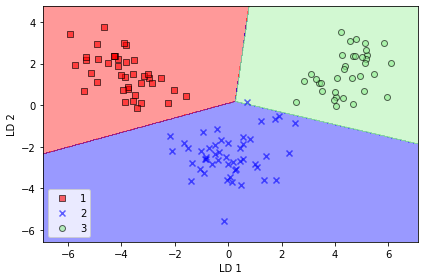

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda3.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


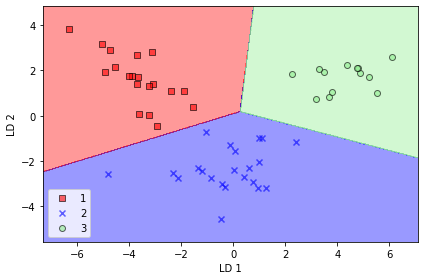

In [0]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda4.png', dpi=300)
plt.show()

<br>
<br>

# Using kernel PCA for nonlinear mappings

- Many real data points are *not* linearly separable. 
- In such cases, PCA and LDA are not very good choices, since they are essentially linear transformations.

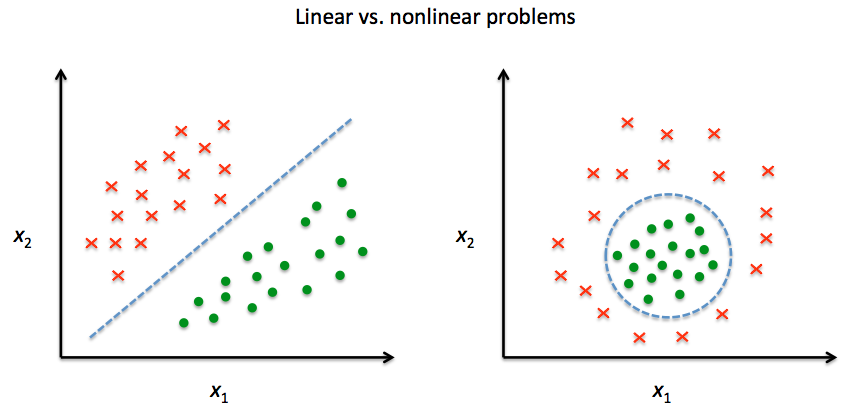

In [0]:
Image(filename='./images/05_11.png', width=500) 

## Kernel functions and the kernel trick

The nonlinear mapping function $\phi: \mathbb{R}^d \to \mathbb{R}^k \;\; (k \gg d)$

In kernel PCA, we will use such mappings to project not linearly separable data points into higher dimensional feature space, and apply the standard PCA in this new feature space.

Recall PCA, where we've considered the covariance matrix of zero-centered data:

$$
  \Sigma = \frac{1}{n} \sum_{i=1}^n x^{(i)} (x^{(i)})^T
$$

Now we consider the PCA not in the original feature space (input space), but in the new space induced by the feature mapping $\phi$:

$$
   \Sigma = \frac{1}{n} \sum_{i=1}^n \phi(x^{(i)}) \phi(x^{(i)})^T
$$

To obtain the principal components $v$, we consider the eigenvalue problem:

$$
         \Sigma_{k\times k} v = \lambda v
$$

$$
 \Rightarrow \frac{1}{n} \sum_{i=1}^n \phi(x^{(i)}) \phi(x^{(i)})^T v = \lambda v
$$

$$
 v = \frac{1}{n\lambda } \sum_{i=1}^n \phi(x^{(i)}) \phi(x^{(i)})^T v = \frac{1}{n} \sum_{i=1}^n a^{(i)} \phi(x^{(i)}) 
$$


where $a^{(i)} = \frac{1}{\lambda} \phi(x^{(i)})^T v$. Since $v$ is the principal component, we can interpret $a^{(i)}$ as the coordinate of $x^{(i)}$ in the induced feature space, projected onto $v$ (in other words, the coordinate we can use for plotting).

We now use $\phi(X)$ to be $n\times k$ matrix, so that

$$
  \Sigma = \frac{1}{n} \phi(X)^T \phi(X)
$$

and the eigenvector equation to be

$$
   v = \frac{1}{n} \phi(X)^T \vec a
$$

From $\Sigma v = \lambda v$, we get

$$
  \frac{1}{n} \phi(X)^T \phi(X) \phi(X)^T \vec a = \lambda \phi(X)^T \vec a
$$

Multiplying $\phi(X)$ on both sides, we obtain

$$
\frac{1}{n} \phi(X) \phi(X)^T \phi(X) \phi(X)^T \vec a = \lambda \phi(X) \phi(X)^T \vec a
$$

$$
 \Rightarrow \frac{1}{n} \underbrace{\phi(X) \phi(X)^T}_{=: K} \vec a = \lambda \vec a
$$

$$
  \frac{1}{n} K_{n\times n}\vec a = \lambda \vec a
$$

Here, $K$ is the kernel matrix, defined by

$$
  K_{ij} = k(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^T \phi(x^{(j)})
$$

- Polynomial kernel
$$
  k(x^{(i)}, x^{(j)}) = ((x^{(i)})^T x^{(j)} + \theta)^p
$$

- Hyperbolic tangent (sigmoid) kernel
$$
  k(x^{(i)}, x^{(j)}) = \tanh(\eta (x^{(i)})^T x^{(j)} + \theta)
$$

- Gaussian RBF kernel
$$
    k(x^{(i)}, x^{(j)}) = \exp(-\gamma \|x^{(i)}-x^{(j)}\|^2)
$$

Before we solve
$$
  \frac{1}{n} K \vec a = \lambda \vec a,
$$

we need center the kernel matrix by (why?)

$$
  K = K - 1_n K - K 1_n + 1_n K 1_n
$$

where $1_n$ is $n\times n$ matrix with all elements equal to $\frac{1}{n}$.


<br>
<br>

## Implementing a kernel principal component analysis in Python

In [0]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from numpy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.linalg.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))

    return X_pc

<br>

### Example 1: Separating half-moon shapes

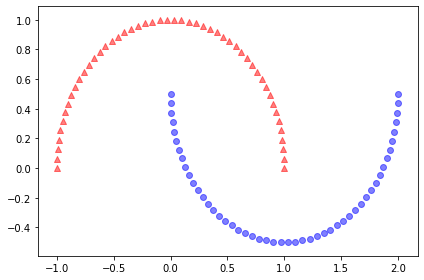

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./figures/half_moon_1.png', dpi=300)
plt.show()

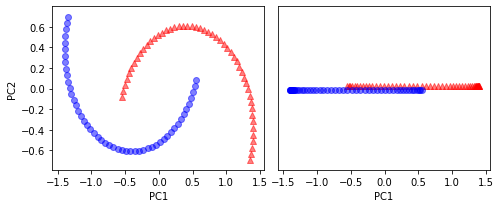

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/half_moon_2.png', dpi=300)
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


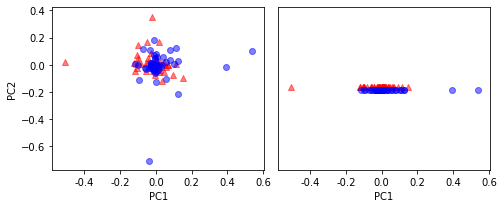

In [0]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma=10000, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.tight_layout()
# plt.savefig('./figures/half_moon_3.png', dpi=300)
plt.show()

<br>

### Example 2: Separating concentric circles

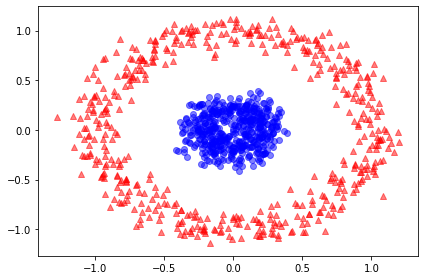

In [0]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./figures/circles_1.png', dpi=300)
plt.show()

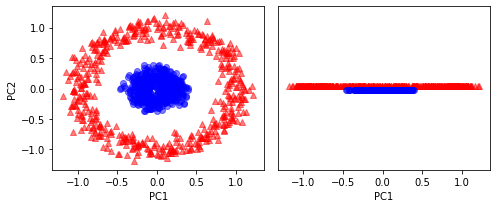

In [0]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/circles_2.png', dpi=300)
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


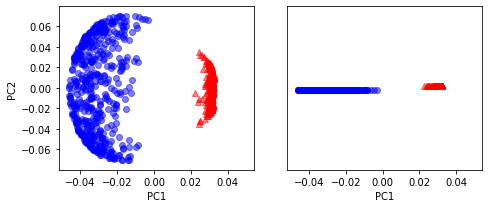

In [0]:
X_kpca = rbf_kernel_pca(X, gamma=5, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/circles_3.png', dpi=300)
plt.show()

<br>
<br>

## Projecting new data points

To compute the new coordinate of a new point $x'$ along the principal component $v$, we need to compute
$$
  a = \frac{1}{\lambda} \phi(x')^T v .
$$

But in kernel PCA, we do not compute $v$ explicitly.

We can use the kernel trick:

$$
   \phi(x')^T v = \frac{1}{n} \sum_{i=1}^n a^{(i)} \underbrace{\phi(x')^T \phi(x^{(i)})}_{= k(x', x^{(i)})}
$$

Recall: 
$$
   v = \frac{1}{n} \phi(X)^T \vec a
$$

In [0]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   
     
     lambdas: list
       Eigenvalues

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, -i]
                              for i in range(1, n_components + 1)))

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1, n_components + 1)]

    return alphas, lambdas

In [0]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [0]:
x_new = X[-1]
x_new

array([ 0.48160743, -0.35514276])

In [0]:
x_proj = alphas[-1] # original projection
x_proj

array([0.11916726])

In [0]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

# projection of the "new" datapoint
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj 

array([0.11916726])

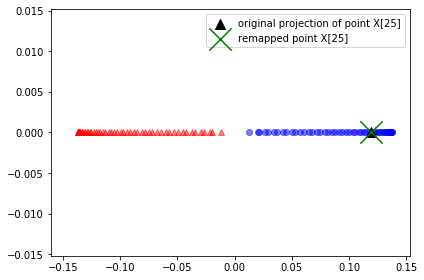

In [0]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)

plt.tight_layout()
# plt.savefig('./figures/reproject.png', dpi=300)
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


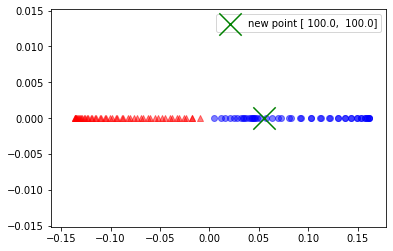

In [0]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X[:-1, :], gamma=15, n_components=1)

def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

# projection of the "new" datapoint
x_new = X[-1]

x_reproj = project_x(x_new, X[:-1], gamma=15, alphas=alphas, lambdas=lambdas)


plt.scatter(alphas[y[:-1] == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y[:-1] == 1, 0], np.zeros((49)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_reproj, 0, color='green',
            label='new point [ 100.0,  100.0]', marker='x', s=500)
plt.legend(scatterpoints=1)


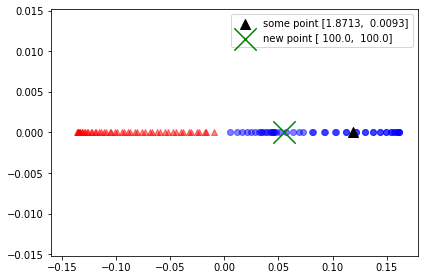

In [0]:
plt.scatter(alphas[y[:-1] == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y[:-1] == 1, 0], np.zeros((49)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='some point [1.8713,  0.0093]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='new point [ 100.0,  100.0]', marker='x', s=500)
plt.legend(scatterpoints=1)

plt.tight_layout()
# plt.savefig('./figures/reproject.png', dpi=300)
plt.show()

<br>
<br>

## Kernel principal component analysis in scikit-learn

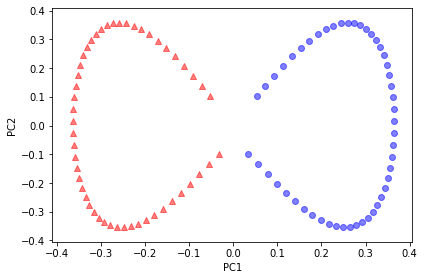

In [0]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('./figures/scikit_kpca.png', dpi=300)
plt.show()

<br>
<br>

# Clustering Analysis

<br>
<br>

In [0]:
from IPython.display import Image
%matplotlib inline

# Grouping objects by similarity using k-means

find groups of similar objects, objects that are more related to each other than to objects in other groups.

 - documents, music, and movies by different topics
 - customers with common purchase behaviors (as a basis for recommendation engines)
 

#### Clustering methods
- Prototype-based clustering: each cluster is represented by a prototype
  - centroid (average)
  - medoid (the most representative or most frequently occurring point)
- Hierarchical clustering
- Density-based clustering

In [0]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

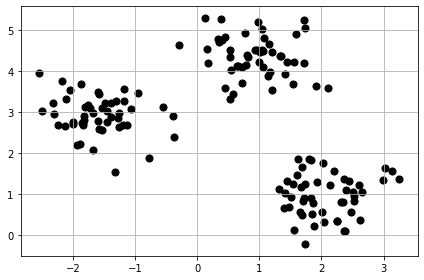

In [0]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/spheres.png', dpi=300)
plt.show()

#### K-means algorithm:
1. Randomly pick k centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid μ(j), j∈{1,...,k}.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat the steps 2 and 3 until the cluster assignment do not change or a user-defined tolerance or a maximum number of iterations is reached.

K-means is an iterative approach for minimizing the **within-cluster sum of squared errors (SSE)**, which is sometimes also called **cluster inertia**:

$$
   SSE = \sum_{i=1}^n \sum_{j=1}^m w(i,j) \| x(i)−μ(j) \|_2^2
$$

Here, μ (j) is the representative point (centroid) for cluster j, and w(i , j ) = 1 if the sample
x(i) is in cluster j; w(i, j) = 0 otherwise.

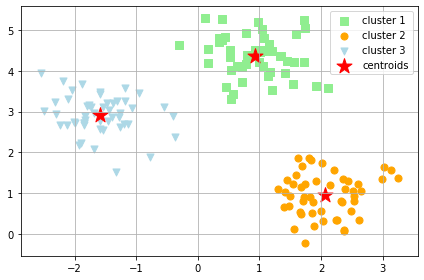

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,   # need to specify the number of clusters
            init='random', 
            n_init=10,      # no. instances with random init
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

<br>

## K-means++

#### Potential problems of the classic k-means
- Using a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly
- One or more clusters can be empty

#### K-Means++
- D. Arthur and S. Vassilvitskii. k-means++: The Advantages of Careful Seeding. In Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, pages 1027–1035. Society for Industrial and Applied Mathematics, 2007


1. Initialize an empty set M to store the k centroids being selected.
2. Randomly choose the  first centroid μ ( j ) from the input samples and assign it to M .
3. For each sample x(i) that is not in M , find the minimum squared distance $d (x(i),M)^2$ to any of the centroids in M .
4. To randomly select the next centroid μ(p) , use a weighted probability distribution equal to
$$
\frac{d(μ(p),M)^2}{ \sum_i d(x^{(i)} ,M)^2}
$$
5. Repeat steps 2 and 3 until k centroids are chosen.
6. Proceed with the classic k-means algorithm.

<br>
<br>

# Organizing clusters as a hierarchical tree

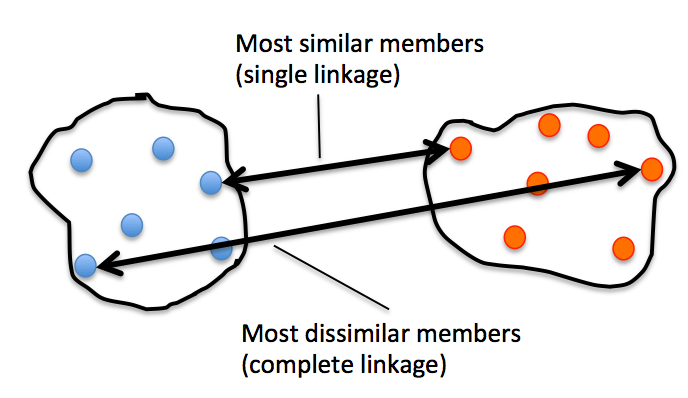

In [0]:
Image(filename='./images/11_05.png', width=400) 

In [0]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


<br>

## Performing hierarchical clustering on a distance matrix

In [0]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the `pdist` function, or we can pass the "original" data array and define the `metric='euclidean'` argument in `linkage`. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [0]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [0]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [0]:
# 3. correct approach: Input sample matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


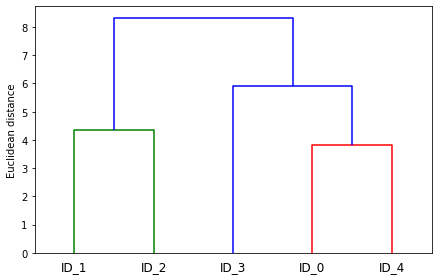

In [0]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

<br>

## Attaching dendrograms to a heat map

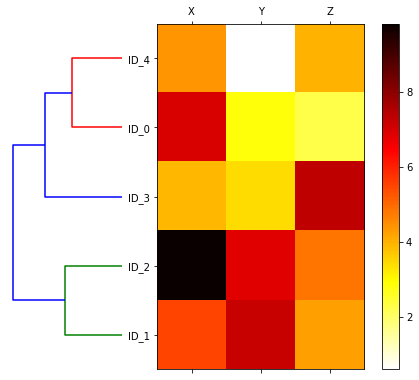

In [0]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

<br>

## Applying agglomerative clustering via scikit-learn

In [0]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


<br>
<br>

# Locating regions of high density via DBSCAN

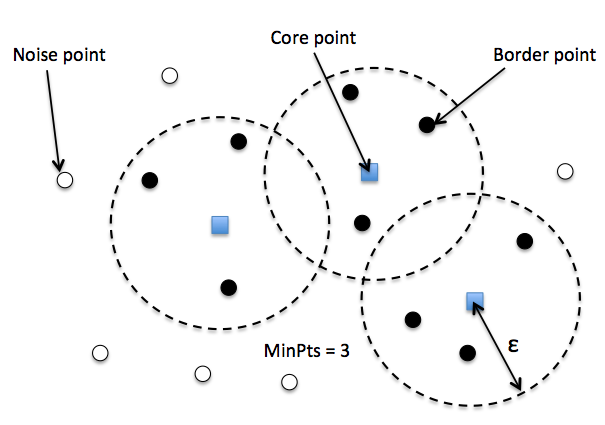

In [0]:
Image(filename='./images/11_11.png', width=500) 

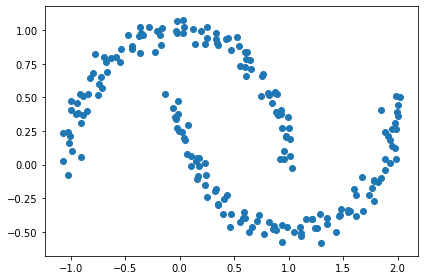

In [0]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
# plt.savefig('./figures/moons.png', dpi=300)
plt.show()

K-means and hierarchical clustering:

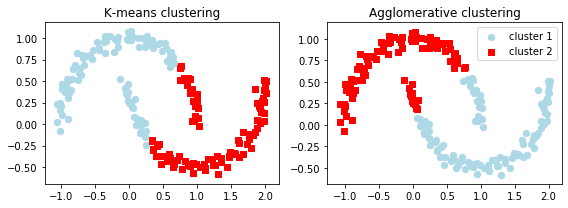

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

Density-based clustering:

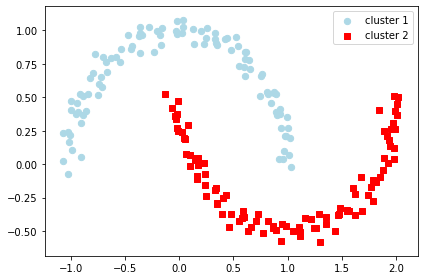

In [0]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('./figures/moons_dbscan.png', dpi=300)
plt.show()

<br>
<br>